In [1]:
%load_ext autoreload
%autoreload 2
from ga.numba_ga import GaHMM
from data.digits import DigitDataset
import hmm.bw as bw
from hmm.hmm import random_left_right_hmm_params
import seaborn as sns

import ga.crossover as crossover
import ga.mutation as mutation
import ga.selection as selection

In [4]:
train_data = DigitDataset(dataset='train')
observations = train_data.get_first_n_observations(0, 50)

gabw = GaHMM(
        n_symbols=128,
        n_states=4,
        population_size=13,
        n_generations=200,
        observations=observations)
# gabw.fitness_func = mean_log_prob_fitness(observation_sequences)
gabw.mutation_func = mutation.constant_uniform_mutation_factory(mutation_threshold=0.1)
gabw.crossover_func = crossover.uniform_crossover
gabw.parent_select_func = selection.rank_selection_factory(gabw.population_size)


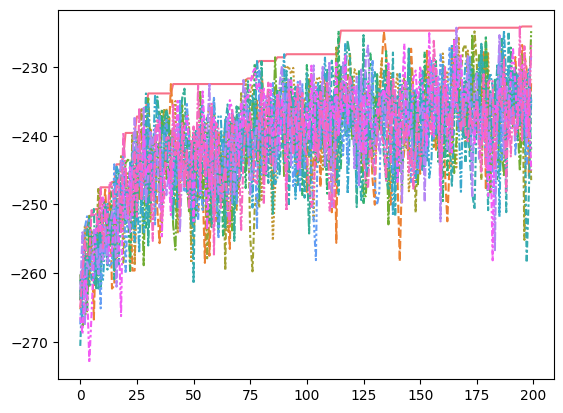

In [5]:
# print(gabw.population[:, gabw.slices.fitness])
gabw.n_bw_iterations_before_ga = 0
gabw.start()
gabw.plot()
# print(gabw.population[:, gabw.slices.fitness])

In [15]:
gabw.logs.logs[:, 19]

array([7.43339042e-312, 7.43339042e-312, 7.43336711e-312, 7.43336711e-312,
       7.43339042e-312, 7.43339042e-312, 7.43339042e-312, 7.43339042e-312,
       7.43339042e-312, 7.43339042e-312, 7.43339042e-312, 7.43527332e-312,
       8.30030285e-322])

In [ ]:
params = random_left_right_hmm_params(gabw.n_states, gabw.n_symbols)
new_params, trace = bw.train_multiple_observations(params, observations, n_iterations=100)
sns.lineplot(data=trace.T / 50)

In [ ]:
index = 5
start, stop, _ = gabw.slices.emission_probs
emission_probs = population_prior[0, start:stop]
sns.histplot(population_prior[index, start:stop], bins=200)

In [ ]:
sns.histplot(gabw.population[index, start:stop], bins=200)

In [ ]:
population_prior[1]